In [1]:
#IMPORTAÇÕES

#import tensorflow as tf
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
ticker = "^BVSP"
inicio = "2010-01-01"
fim = "2022-11-26"

In [3]:
df = pdr.get_data_yahoo(ticker, start = inicio, end= fim)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,68587.0,70081.0,68587.0,70045.0,70045.0,1655400
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-21,108868.0,110235.0,107957.0,109748.0,109748.0,16651600
2022-11-22,109750.0,110224.0,107867.0,109037.0,109037.0,15056500
2022-11-23,109036.0,109285.0,107902.0,108683.0,108683.0,13198400
2022-11-24,108846.0,112612.0,108846.0,111831.0,111831.0,10296900
2022-11-25,111831.0,112025.0,108552.0,108977.0,108977.0,12309100


<AxesSubplot:xlabel='Date'>

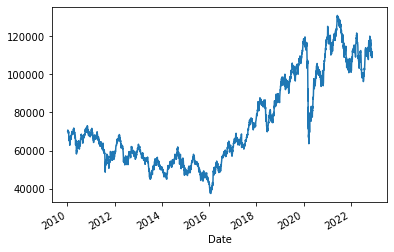

In [6]:
df.Close.plot()

In [7]:
vals = df['2022-11-21':'2022-11-25'].Close.values

In [8]:
mean_val = np.mean(vals)

([<matplotlib.axis.XTick at 0x1e816e01580>,
 [Text(1, 0, 'Seg'),
  Text(2, 0, 'Ter'),
  Text(3, 0, 'Qua'),
  Text(4, 0, 'Qui'),
  Text(5, 0, 'Sex')])

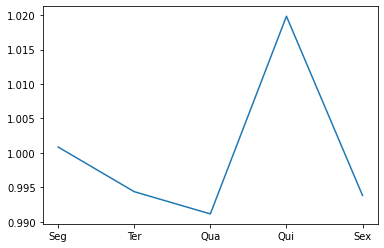

In [9]:
plt.plot([1, 2, 3, 4, 5], vals/mean_val)
plt.xticks([1, 2, 3, 4, 5],
          labels = ['Seg','Ter','Qua','Qui','Sex'])

In [10]:
df['Return'] = df.Close - df.Open

<AxesSubplot:xlabel='Date'>

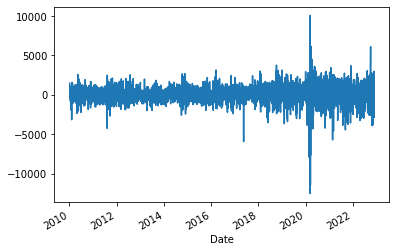

In [11]:
df.Return.plot()

In [12]:
df['DailyVolatility'] = df.High - df.Low

<AxesSubplot:xlabel='Date'>

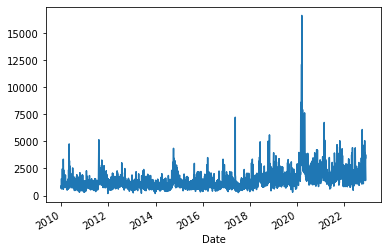

In [13]:
df.DailyVolatility.plot()

<AxesSubplot:xlabel='Date'>

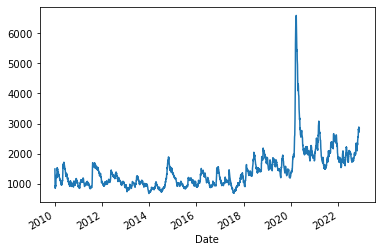

In [14]:
ewdf = df.ewm(halflife = 10).mean()
ewdf.DailyVolatility.plot()

In [15]:
vewdf = df.ewm(halflife = 10).var()

In [16]:
scaled = df.DailyVolatility - ewdf.DailyVolatility
scaled = scaled / vewdf.DailyVolatility**0.5

<AxesSubplot:xlabel='Date'>

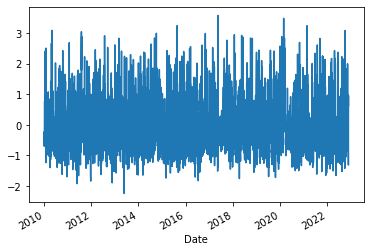

In [17]:
scaled.plot()

In [18]:
df['ScaledVolatility'] = ((df.DailyVolatility -
                          ewdf.DailyVolatility)
                         / vewdf.DailyVolatility**0.5)
df['ScaledReturn'] = ((df.Return - ewdf.Return)
                     / vewdf.Return**0.5)
df['ScaledVolume'] = ((df.Volume - ewdf.Volume)
                     / vewdf.Volume**0.5)

In [19]:
df = df.dropna()

In [20]:
df

,Open,High,Low,Close,Adj Close,Volume,Return,DailyVolatility,ScaledVolatility,ScaledReturn,ScaledVolume
Date,,,,,,,,,,,
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200,194.0,667.0,-0.682610,-0.682610,0.682610
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600,492.0,921.0,-0.224978,-0.310120,0.915295
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000,-272.0,678.0,-0.647851,-0.969332,-0.947643
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400,-192.0,608.0,-0.687026,-0.703222,-0.591904
2010-01-11,70267.0,71068.0,70158.0,70433.0,70433.0,1569000,166.0,910.0,0.156139,-0.159502,-0.691438
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-21,108868.0,110235.0,107957.0,109748.0,109748.0,16651600,880.0,2278.0,-0.562122,0.581805,-0.162677
2022-11-22,109750.0,110224.0,107867.0,109037.0,109037.0,15056500,-713.0,2357.0,-0.463628,-0.239455,-0.542158
2022-11-23,109036.0,109285.0,107902.0,108683.0,108683.0,13198400,-353.0,1383.0,-1.312019,-0.044072,-0.955872


In [21]:
train_df = df[:1500]
test_df = df[1500:]

In [22]:
train_df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,DailyVolatility,ScaledVolatility,ScaledReturn,ScaledVolume
Date,,,,,,,,,,,
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200,194.0,667.0,-0.682610,-0.682610,0.682610
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600,492.0,921.0,-0.224978,-0.310120,0.915295
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000,-272.0,678.0,-0.647851,-0.969332,-0.947643
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400,-192.0,608.0,-0.687026,-0.703222,-0.591904
2010-01-11,70267.0,71068.0,70158.0,70433.0,70433.0,1569000,166.0,910.0,0.156139,-0.159502,-0.691438


In [23]:
train_df.tail(30)

,Open,High,Low,Close,Adj Close,Volume,Return,DailyVolatility,ScaledVolatility,ScaledReturn,ScaledVolume
Date,,,,,,,,,,,
2015-12-14,45258.0,45258.0,44531.0,44747.0,44747.0,2481600,-511.0,727.0,-0.688739,-0.508578,-1.169267
2015-12-15,44748.0,45423.0,44748.0,44872.0,44872.0,2558500,124.0,675.0,-0.755763,0.263649,-1.010437
2015-12-16,44868.0,45099.0,44095.0,45016.0,45016.0,3324300,148.0,1004.0,-0.043802,0.283307,-0.199541
2015-12-17,45016.0,46251.0,45016.0,45261.0,45261.0,3028800,245.0,1235.0,0.452961,0.394373,-0.497705
2015-12-18,45249.0,45249.0,43690.0,43911.0,43911.0,4564700,-1338.0,1559.0,1.102720,-1.531406,1.114491
2015-12-21,43912.0,44223.0,43196.0,43200.0,43200.0,3452900,-712.0,1027.0,-0.099963,-0.697606,-0.101874
2015-12-22,43208.0,43632.0,43137.0,43470.0,43470.0,2577000,262.0,495.0,-1.227269,0.535882,-1.017586
2015-12-23,43479.0,44233.0,43479.0,44015.0,44015.0,2501300,536.0,754.0,-0.604389,0.844513,-1.023202
2015-12-28,44016.0,44087.0,43709.0,43764.0,43764.0,1793200,-252.0,378.0,-1.334532,-0.198625,-1.584076


In [24]:
test_df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,DailyVolatility,ScaledVolatility,ScaledReturn,ScaledVolume
Date,,,,,,,,,,,
2016-02-01,40397.0,40570.0,39738.0,40570.0,40570.0,3661700,173.0,832.0,-0.439662,0.242065,-0.018110
2016-02-02,40564.0,40564.0,38596.0,38596.0,38596.0,4425300,-1968.0,1968.0,2.077629,-2.104649,0.791992
2016-02-03,38597.0,39726.0,38597.0,39589.0,39589.0,4238100,992.0,1129.0,0.150589,1.186103,0.553266
2016-02-04,39589.0,41444.0,39589.0,40822.0,40822.0,5388500,1233.0,1855.0,1.620815,1.314315,1.634496
2016-02-05,40812.0,41249.0,40566.0,40592.0,40592.0,3669000,-220.0,683.0,-0.897020,-0.257247,-0.209776


In [25]:
test_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,DailyVolatility,ScaledVolatility,ScaledReturn,ScaledVolume
Date,,,,,,,,,,,
2022-11-21,108868.0,110235.0,107957.0,109748.0,109748.0,16651600,880.0,2278.0,-0.562122,0.581805,-0.162677
2022-11-22,109750.0,110224.0,107867.0,109037.0,109037.0,15056500,-713.0,2357.0,-0.463628,-0.239455,-0.542158
2022-11-23,109036.0,109285.0,107902.0,108683.0,108683.0,13198400,-353.0,1383.0,-1.312019,-0.044072,-0.955872
2022-11-24,108846.0,112612.0,108846.0,111831.0,111831.0,10296900,2985.0,3766.0,0.961750,1.582704,-1.505666
2022-11-25,111831.0,112025.0,108552.0,108977.0,108977.0,12309100,-2854.0,3473.0,0.640880,-1.313587,-0.944821


In [26]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return,DailyVolatility,ScaledVolatility,ScaledReturn,ScaledVolume
count,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3.191000e+03,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000
mean,74620.822626,75334.192416,73904.082419,74631.445002,74631.445002,5.075722e+06,10.622375,1430.109997,-0.016831,-0.010384,0.037750
std,23658.614026,23836.216300,23470.919842,23667.223328,23667.223328,3.600574e+06,1173.226301,956.780215,0.898163,0.919527,0.897597
min,37501.000000,38031.000000,37046.000000,37497.000000,37497.000000,0.000000e+00,-12520.000000,187.000000,-2.243994,-3.316113,-3.071937
25%,55408.000000,56048.000000,54826.000000,55418.500000,55418.500000,2.793950e+06,-570.000000,877.500000,-0.673022,-0.626996,-0.508524
50%,66084.000000,66662.000000,65533.000000,66108.000000,66108.000000,3.744800e+06,25.000000,1201.000000,-0.167123,-0.029335,-0.030926
75%,96575.500000,97685.000000,95678.000000,96655.500000,96655.500000,5.949750e+06,635.500000,1725.000000,0.482333,0.646522,0.538389
max,130776.000000,131190.000000,129526.000000,130776.000000,130776.000000,2.602930e+07,10057.000000,16615.000000,3.583625,2.790438,3.514875


In [27]:
test_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return,DailyVolatility,ScaledVolatility,ScaledReturn,ScaledVolume
count,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1.691000e+03,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000
mean,90112.136606,90992.308102,89255.785334,90151.974571,90151.974571,6.751426e+06,39.837966,1736.522768,-0.004194,-0.005482,0.043911
std,22294.995916,22406.036134,22125.989920,22266.969136,22266.969136,4.085762e+06,1427.295506,1148.788110,0.896567,0.920420,0.892355
min,38597.000000,39726.000000,38596.000000,38596.000000,38596.000000,0.000000e+00,-12520.000000,270.000000,-1.826426,-3.316113,-3.071937
25%,72162.000000,72994.000000,71095.000000,72209.500000,72209.500000,3.534800e+06,-650.500000,1059.500000,-0.659614,-0.577088,-0.473571
50%,95351.000000,96315.000000,94173.000000,95351.000000,95351.000000,5.072900e+06,74.000000,1491.000000,-0.156157,0.000388,-0.001430
75%,108936.000000,110151.500000,108062.500000,108957.500000,108957.500000,9.855300e+06,831.000000,2096.500000,0.476017,0.653023,0.541327
max,130776.000000,131190.000000,129526.000000,130776.000000,130776.000000,2.602930e+07,10057.000000,16615.000000,3.583625,2.706410,3.514875


In [28]:
train_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return,DailyVolatility,ScaledVolatility,ScaledReturn,ScaledVolume
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,57156.948000,57682.276667,56597.59600,57134.634667,57134.634667,3.186644e+06,-22.313333,1084.680667,-0.031077,-0.015910,0.030805
std,7405.525432,7397.813524,7403.68477,7412.330432,7412.330432,1.424657e+06,793.996528,484.689948,0.900045,0.918795,0.903717
min,37501.000000,38031.000000,37046.00000,37497.000000,37497.000000,0.000000e+00,-4270.000000,187.000000,-2.243994,-2.719130,-2.978136
25%,51798.500000,52288.750000,51230.25000,51779.500000,51779.500000,2.263550e+06,-515.500000,761.750000,-0.692472,-0.673443,-0.559351
50%,56257.000000,56844.000000,55597.50000,56240.000000,56240.000000,2.999300e+06,-39.000000,997.500000,-0.183773,-0.056198,-0.063304
75%,63013.500000,63501.250000,62396.75000,62972.500000,62972.500000,3.848200e+06,453.000000,1281.250000,0.487042,0.640640,0.536840
max,72987.000000,73103.000000,72534.00000,72996.000000,72996.000000,1.423340e+07,2681.000000,5145.000000,3.250984,2.790438,3.099483


In [29]:
horizon = 10
X = train_df[:(1500 - horizon)][["ScaledVolatility", "ScaledReturn", "ScaledVolume"]].values
Y = train_df[horizon:]["ScaledReturn"].values

In [30]:
X

array([[-0.68261013, -0.68261013,  0.68261013],
       [-0.22497837, -0.3101201 ,  0.9152952 ],
       [-0.64785096, -0.96933233, -0.94764308],
       ...,
       [-0.16212767, -0.2482724 ,  0.19166062],
       [ 0.8185978 , -0.43719556,  0.39887624],
       [ 0.31620312,  1.24937931,  0.72823016]])

In [31]:
X = np.expand_dims(X, axis = 1)

In [32]:
X

array([[[-0.68261013, -0.68261013,  0.68261013]],

       [[-0.22497837, -0.3101201 ,  0.9152952 ]],

       [[-0.64785096, -0.96933233, -0.94764308]],

       ...,

       [[-0.16212767, -0.2482724 ,  0.19166062]],

       [[ 0.8185978 , -0.43719556,  0.39887624]],

       [[ 0.31620312,  1.24937931,  0.72823016]]])

In [33]:
X = np.split(X, X.shape[0]/10, axis= 0)
X = np.concatenate(X, axis = 1)
X.shape

(10, 149, 3)

In [34]:
#Arquiterua

NUM_HIDDEN = 4
NUM_LAYERS = 2

In [35]:
#formatacao de dados

BATCH_SIZE = 64
WINDOW_SIZE = 20

In [36]:
#parametros de treinamento

LEARNING_RATE = 1e-2
EPOCHS = 30

In [37]:
Xinp = tf.placeholder(dtype = tf.float32,
                          shape = [WINDOW_SIZE, None, 3])
Yinp = tf.placeholder(dtype = tf.float32, shape = [None])

In [38]:
# calculos de perda e etapas de otimizacao

with tf.variable_scope("scope1", reuse=tf.AUTO_REUSE):
    cells = [tf.nn.rnn_cell.LSTMCell(num_units=NUM_HIDDEN)
                        for n in range (NUM_LAYERS)]
    stacked_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(cells)
    rnn_output, states = tf.nn.dynamic_rnn(stacked_rnn_cell,
                                           Xinp,
                                           dtype=tf.float32)
    W=tf.get_variable("W_fc", [NUM_HIDDEN, 1],
                     initializer = 
                     tf.random_uniform_initializer(-.2, .2))
    
    #Não temos viés pois esperamos retorno zero média
    output = tf.squeeze(tf.matmul(rnn_output[-1, :, :], W))
    
    loss = tf.nn.l2_loss(output - Yinp)
    opt = tf.train.GradientDescentOptimizer(LEARNING_RATE)
    train_step = opt.minimize(loss)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\adria\AppData\Local\Temp\ipykernel_9988\2019475433.py:4: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cells = [tf.nn.rnn_cell.LSTMCell(num_units=NUM_HIDDEN)


In [39]:
## Para cada epoca

y_hat_dict = {}
Y_dict = {}

in_sample_Y_dict = {}
in_sample_y_hat_dict = {}

for ep in range(EPOCHS):
    epoch_training_loss = 0.0
    for i in range(WINDOW_SIZE):
        X = train_df[:(1500 - WINDOW_SIZE)][["ScaledVolatility",
                                            "ScaledReturn",
                                            "ScaledVolume"]].values
        Y = train_df[WINDOW_SIZE:]["ScaledReturn"].values
        
        ## Torna-o divisivel pelo tamanho da janela
        num_to_unpack = math.floor(X.shape[0] / WINDOW_SIZE)
        start_idx = X.shape[0] - num_to_unpack * WINDOW_SIZE
        X = X[start_idx:]
        Y = Y[start_idx:]
        
        X = X[i: -(WINDOW_SIZE-i)]
        Y = Y[i: -(WINDOW_SIZE-i)]
        
        X = np.expand_dims(X, axis = 1)
        X = np.split(X, X.shape[0]/WINDOW_SIZE, axis = 0)
        X = np.concatenate(X, axis = 1)
        Y = Y[::WINDOW_SIZE]
        ## TREINAMENTO
        ## Agora coloca em batch e executa uma sessão
        for j in range(math.ceil(Y.shape[0] / BATCH_SIZE)):
            ll = BATCH_SIZE * j
            ul = BATCH_SIZE * (j + 1)
            
            if ul > X.shape[1]:
                ul = X.shape[1] - 1
                ll = X.shape[1] - BATCH_SIZE
                
            training_loss, _, y_hat = sess.run([loss, train_step, output],
                                              feed_dict = {Xinp: X[: ll:ul, :],
                                                          Yinp: Y[ll:ul]
                                                          })
            epoch_training_loss += training_loss
            
            in_sample_Y_dict[ep] = Y[ll:ul]
            ## Repare que isso nos dender[a apenas a ultima parte dos dados treinados
            in_sample_y_hat_dict[ep] = y_hat
            
            ##TESTE
            X = test_df[:(test_df.shape[0] - WINDOW_SIZE)][["ScaledVolatility","ScaledReturn","ScaledVolume"]].values
            Y = test_df[WINDOW_SIZE:]["ScaledReturn"].values
            num_to_unpack = math.floor(X.shape[0] / WINDOW_SIZE)
            start_idx = X.shape[0] - num_to_unpack * WINDOW_SIZE
            ## Melhor descartar no inicio do que no final do periodo de treinamento quando deve ser deletado
            X = X[start_idx:]
            Y = Y[start_idx:]
            
            X = np.expand_dims(X, axis = 1)
            X = np.split(X, X.shape[0]/WINDOW_SIZE, axis = 0)
            X = np.concatenate(X, axis = 1)
            Y = Y[::WINDOW_SIZE]
            testing_loss, y_hat = sess.run([loss, output],
                                          feed_dict = {Xinp: X, Yinp: Y})
            
            ## Não é o ideal. Deveriamos realmente ter uma perda de validação além do teste.
            
        print("Epoch: %d Training loss: %0.2f Testing loss %0.2f:" %
             (ep, epoch_training_loss, testing_loss))
            
            
            

NameError: name 'sess' is not defined

In [ ]:
# sess = tf.Session()